## Introduction to Pandas

#### **EXERCISE 1:** Introduction to Series

To start working with pandas package, we will be importing it. Import Pandas in the cell below.

In [1]:
#import the pandas library here
import pandas as pd

**Series** and **DataFrame** are two major data structures that we will explain in this session.

### Series

Pandas **Series** is *a one-dimensional array that can hold indexed data of any type (integers, strings, floating point numbers, Python objects, etc.)*. Series can be created using: 

* Python dictionary
* NumPy ndarray (more on this later)
* Scalar value
* List

By using the following list, create a pandas Series:

list_ser = [45, 123, 67, 1, 14]

In [2]:
#Create a pandas series using the given list
list_ser = [45, 123, 67, 1, 14]
serA = pd.Series(list_ser)
serA

0     45
1    123
2     67
3      1
4     14
dtype: int64

In [3]:
#Check the type of created series
type(serA)

pandas.core.series.Series

Two columns will be displayed when you print the created series. Investigate column one. Check its values. After that create another pandas series with the same above given list but with ['Num1','Num2','Num3','Num4','Num5'] as indices, float as a data type, and "Numbers" as a name.

In [4]:
serB = pd.Series(list_ser, 
                 index=['Num1','Num2','Num3','Num4','Num5'],  # indices can be strings
                 dtype='float',     # even though the list contains integers, we want the Series to be floating point
                 name='Numbers')
serB

Num1     45.0
Num2    123.0
Num3     67.0
Num4      1.0
Num5     14.0
Name: Numbers, dtype: float64

Pandas created a `Series` using the list `list_ser`, the `dtype` of the `Series` is `int64`. The type of data was inferred since we didn't provide a parameter and didn't specify explicitly what type of the data we are planning to use. `pandas` determined that all numbers in the original list were integers, making the resulting `Series` a 64-bit integer.

The first column of numbers from 0 to 4 is the **index**. When we created a `Series`, we didn't specify if we want an index to be something specific, hence `pandas` used default values. 

**NOTE:** The default index in pandas **always starts with 0 (zero)**.

Print the index of the new series.

In [5]:
serA.index

RangeIndex(start=0, stop=5, step=1)

In [6]:
serB.index

Index(['Num1', 'Num2', 'Num3', 'Num4', 'Num5'], dtype='object')

Print the values of the new series

In [7]:
serA.values

array([ 45, 123,  67,   1,  14], dtype=int64)

In the next exercise we will create a `Series` from a dictionary. You will use population of the top 5 Canadian provinces (retrieved from [Statistics Canada](https://www150.statcan.gc.ca/n1/pub/12-581-x/2018000/pop-eng.htm) web site, the 2017 column of data has been used):

In [8]:
population_dict = { 'QC': 8394034,'ON': 14193384, 'BC': 4817160, 'AB': 4286134, 'MB': 1338109}

In [9]:
#Create a pandas series using the given above dictionary
provinces_population = pd.Series(population_dict, name='Top 5 provinces by population')

In [10]:
#print out the newly created series.
provinces_population

QC     8394034
ON    14193384
BC     4817160
AB     4286134
MB     1338109
Name: Top 5 provinces by population, dtype: int64

Determine the indices and the values.
Are the indices sorted by default. What if you want the indices to be sorted by population?

When dictionary is used to create a `Series`, dictionary keys become indices. You can also notice that `pandas` sorted the elements of the series alphabetically by the key value. We can override this default behaviour by passing the index values in the order we want them to appear.

In [11]:
#Recreate the series, but this time sort the indices by poplution of the provinces.
provinces = ['ON', 'QC', 'BC', 'AB', 'MB']

provinces_population = pd.Series(population_dict, index = provinces, name='Top 5 provinces by population')
provinces_population

ON    14193384
QC     8394034
BC     4817160
AB     4286134
MB     1338109
Name: Top 5 provinces by population, dtype: int64

We can use the index to select values from a Series. Answer the following questions.

In [12]:
# Population of Ontario
provinces_population['ON']

14193384

In [13]:
# Selecting only provinces with population greater than 5 million.
# This type of selection is called boolean indexing:
provinces_population[provinces_population > 5000000]

ON    14193384
QC     8394034
Name: Top 5 provinces by population, dtype: int64

In [14]:
# Entries with index positions of 2 and 3, should return British Columbia and Alberta: (Use the integer position as an index key)
provinces_population[2:4]

BC    4817160
AB    4286134
Name: Top 5 provinces by population, dtype: int64

In [15]:
# The result of this command should be 3 provinces,
# British Columbia, Alberta and Manitoba (use the strings as indices)
provinces_population['BC':'MB']

BC    4817160
AB    4286134
MB    1338109
Name: Top 5 provinces by population, dtype: int64

Check if Quebec is within the top 5 provinces (by population):

In [16]:
'QC' in provinces_population

True

And what about Nova Scotia:

In [17]:
'NS' in provinces_population

False

Use a built-in function to find the sum of all elements in the above created series

In [18]:
provinces_population.sum()

33028821

What about the mean?

In [19]:
provinces_population.mean()

6605764.2

#### **EXERCISE 2:** Series manipulation 

**Task 1**: Create a new `Series` object which will contain population of Nova Scotia and New Brunswick. Use the data from the [Statistics Canada website](https://www150.statcan.gc.ca/n1/pub/12-581-x/2018000/pop-eng.htm).

In [20]:
# Type your code here
NS_NB_dict = {'NS': 953869, 'NB': 759655}

NS_NB_population = pd.Series(NS_NB_dict)
NS_NB_population

NS    953869
NB    759655
dtype: int64

**Task 2:** Merge your new `Series` and the `provinces_population` into a single `Series` object. Use the [`append()` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.append.html)

In [34]:
# Type your code here
provinces_population = provinces_population.append(NS_NB_population)
provinces_population

C:\Users\hafsa\AppData\Local\Temp\ipykernel_4312\734530010.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  provinces_population = provinces_population.append(NS_NB_population)


ON    14193384
QC     8394034
BC     4817160
AB     4286134
MB     1338109
NS      953869
NB      759655
NS      953869
NB      759655
NS      953869
NB      759655
dtype: int64

### DataFrames

A pandas **DataFrame** is a *2-dimensional tabular data structure with labeled columns and rows*. Columns in `DataFrame` can be of different data types. 

You can think of a `DataFrame` as a group of `pandas` `Series` where each `Series` represents a column of data. You can also think of a `DataFrame` as a collection of columns with the same index rather than a collection of rows. This view will also help in understanding some of `pandas` `DataFrame` functionality.

#### Creating a DataFrame

A `DataFrame` can be created from:

- Dictionary of 1-D structures (`ndarray`s, `list`s, dictionaries, tuples or `Series`)
- List of 1-D structures
- 2-D NumPy `ndarray`
- A `Series`
- Another `DataFrame`

Create a `DataFrame` from the my_data and my_columns:

In [22]:
my_data = [[8, 128, 27.5], [10, 138.9, 34.5], [16, 157.3, 91.1], [6, 116.6, 21.4], [14, 159.2, 54.4]]

my_columns = ['Age', 'Height', 'Weight']

In [23]:
df = pd.DataFrame(data=my_data,columns=my_columns)

In [24]:
df

,Age,Height,Weight
0,8,128.0,27.5
1,10,138.9,34.5
2,16,157.3,91.1
3,6,116.6,21.4
4,14,159.2,54.4


Use info() function to output the summary information about the DataFrame

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     5 non-null      int64  
 1   Height  5 non-null      float64
 2   Weight  5 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 252.0 bytes


Examine the DataFrame's indices:

In [26]:
# Index labels
df.index

RangeIndex(start=0, stop=5, step=1)

Examine the DataFrame's columns:

In [27]:
df.columns

Index(['Age', 'Height', 'Weight'], dtype='object')

 Create a DataFrame from a dictionary.
 Given the following dictionary. Create a dataframe.

In [28]:
area = {'province':['ON', 'QC', 'BC', 'AB', 'MB'],
        'area_land': [917741, 1356128, 925186, 642317, 553556],
        'area_water': [158654, 185928, 19549, 19531, 94241]}

In [29]:
provinces_area = pd.DataFrame(area)
provinces_area

,province,area_land,area_water
0,ON,917741,158654
1,QC,1356128,185928
2,BC,925186,19549
3,AB,642317,19531
4,MB,553556,94241


Set province to be an index for this DataFrame.

In [30]:
provinces_area = provinces_area.set_index('province')
provinces_area

,area_land,area_water
province,,
ON,917741,158654
QC,1356128,185928
BC,925186,19549
AB,642317,19531
MB,553556,94241


### Loading/Saving DataFrames

During your career as a data scientists, you will be analysing the data that will come from different systems, you will receive the data stored in many different formats. Some datasets will be stored in `csv` format or as plain text (`.txt` or no extension plain text), data will be in Excel files (i.e., `.xlsx `), sometimes it will be even stored as documents in `.doc` or `.pdf` formats. You will be retrieving the data from relational and noSQL datastores. 

Most of the time, regardless of the source of the data and its current format, one of the first steps in the data analysis would be to load the data into a `pandas` `DataFrame` and perform exploratory analysis.

In this section, we will learn how to read the data stored in `.csv` format and load it into a `DataFrame`. We will also learn how to save a `DataFrame` to `.csv` format after the processing of the data is complete.

#### Loading DataFrames

For this exercise, we will continue looking into the data that describes Canadian provinces. This time, we will use the data of the last 3 years of [Federal Support to all Canadian Provinces and Territories](https://www.fin.gc.ca/fedprov/mtp-eng.asp). All numbers are in millions of dollars.

Pandas has a `read_csv()` function which we will use. There are quite a few parameters that can be specified to either filter out the characters or even lines within the file which are not relevant or make sure that the data is read in a proper format. For example, by default, the `read_csv()` function expects the column separator to be a comma, but you can change that using the `sep=` parameter, or you can skip rows with `skiprows=` parameter. A complete list of all parameter can be found on the corresponding documentation page for [`read_csv()` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

The dataset that we are planning to use in this section is stored in the `pandas_ex1.csv` file, we assume that the file is in the same folder as the notebook working directory. You can open the file in any text editor, which you have installed on your system, and validate the data. The first six rows will look as follows: 

```
Canadian Provinces and Territories,Two-Letter Abbreviation,2016-17,2017-18,2018-19
Newfoundland and Labrador,NL,724,734,750
Prince Edward Island,PE,584,601,638
Nova Scotia,NS,3060,3138,3201
New Brunswick,NB,2741,2814,2956
Quebec,QC,21372,22720,23749
```

As you can see, the data is formatted perfectly, it contains what looks like a header row and the fields are separated by comma. In this case, we can simply specify the name of the file, and have only one more parameter, separator `sep=`, to make sure that the Python interpreter reads the data correctly:

In [31]:
# Reading a csv
prov_support = pd.read_csv('pandas_ex1.csv', sep=',') 
prov_support

FileNotFoundError: [Errno 2] No such file or directory: 'pandas_ex1.csv'

What do you see in this `DataFrame`? 

1. The first row in the file was indeed a header row
2. Pandas created a `DataFrame` with the index from 0 to 12

Let's check the summary information of the `DataFrame` object:

In [ ]:
prov_support.info()

We can see that the `DataFrame` object has 5 columns of data, 3 columns are integers and 2 columns are of `object` data type. In pandas, "object" usually means `string`. We can also use method `dtypes` to check data types for each column of data:

In [ ]:
prov_support.dtypes

When creating a `DataFrame`, `pandas` attempts to infer type and automatically do data conversion on read.  This includes user-defined value conversions including custom values for missing value markers. 

**Type inference** is one of the most important features of `pandas`.  It means *you do not have to specify which columns are numeric, integer, Boolean, or string*.  Pandas will inspect and specify for you the types.  However, this can lead to problems if not following good practices. 

For example, suppose  a data set uses numbers to represent nominal category levels instead of string labels.  When trying to do an analysis, most statistical packages would default to treating the levels as a numeric, unintentionally implying an ordering and quantity.  If these Python analysis packages also make inferences from the data, then it is also possible that the package would default to another methodology.  Simple time saving features can quickly spiral into more problems.

Therefore, it is a good practice to always check if `pandas` has read the data correctly.  One common problem is when the numeric fields in the data file to be read has leading or trailing spaces, or if the numeric fields contain special characters, for example dollar signs, or thousands separators.  Pandas will read such numeric fields as strings.  You might run into problems with this data if you try to do any calculations on these columns, or use them in visualizations or models

*We can set more parameters while reading the file*.  In the previous section, while creating the `DataFrame` from the dictionary, we decided to use one of the columns as an index.  We can do the same here and use the column with province abbreviations as index for the `DataFrame`.  Of course, we can always update the `DataFrame` afterwards using `set_index()` function, but `read_csv()` has a parameter that accomplishes this when reading the data.

We might also decide to not use the header row from the file as it is too verbose, and specify different names for the columns.  We will demonstrate below how to add column names, because you might not always have a header in the data file, and you will need to specify a header yourself.  It is possible to add it later, but you can also name the columns within `read_csv()`.  Let us see how:

In [ ]:
prov_support = pd.read_csv('pandas_ex1.csv', 
                           sep=',', 
                           skiprows=1,   # skipping one row
                           header=None,  # we are telling pandas that there is no header in the file, as we skipped the first row
                           names=['province_name','province','2016','2017','2018'], # names of columns
                           index_col='province')   # use column 'province' as index

prov_support

We now know how to set both row and column indexes and load the data from the `csv` file into the `DataFrame`.

#### Saving DataFrames

We now understand how to read data. In this section we will discuss how to write and save data once we've finished preparing data for an analysis. 

In `pandas`, we utilize the `to_csv()` function for writing out `DataFrame` data to `csv` format. It is similar to the reading function, except now the parameters are used for formatting output instead of parsing input formatting.

In [ ]:
csv_out = prov_support.to_csv()
csv_out

In [ ]:
# writing to a file
prov_support.to_csv('csv_out1.csv')

In [ ]:
newdf= pd.read_csv('csv_out1.csv')
newdf

We can also make a more elaborate call and specify if we want to include a header row and index, and what character should be used as a column separator:

In [ ]:
prov_support.to_csv('csv_out2.csv',sep='\t',#the seperator used for the columns
                    index=True,     #whether to include indexes in output
                    header=True)    #whether to include headers in output

In [ ]:
newdf1= pd.read_csv('csv_out2.csv',sep='\t')
newdf1

We can find the files on the file system, open them in any text editor and validate the data. The data in the first file, `csv_out1.csv` should be formated as follows:

```
province,province_name,2016,2017,2018
NL,Newfoundland and Labrador,724,734,750
PE,Prince Edward Island,584,601,638
NS,Nova Scotia,3060,3138,3201
NB,New Brunswick,2741,2814,2956
```

Format of the second file, `csv_out2.csv`, will look as follows, the columns are separated by tabs instead of commas:

```
province	province_name	2016	2017	2018
NL	Newfoundland and Labrador	724	734	750
PE	Prince Edward Island	584	601	638
NS	Nova Scotia	3060	3138	3201
NB	New Brunswick	2741	2814	2956
```

In [ ]:
csv_out2= pd.read_csv('csv_out2.csv', sep='\t') 
csv_out2

#### Renaming DataFrame columns

Quite often, after you have read the file and created a `DataFrame`, you realize that the column names are either too long, or contain special characters, or not descriptive enough. 

In our example, we might decide to shorten the names of the first and second columns. We might want to rename "Canadian Provinces and Territories" into "Province Name" and "Two-Letter Abbreviation" into "Province Abbreviation". We also might want to rename the numeric columns to display only one year instead of the range of years. For example, rename `"2016-17"` to be `"2016"` and so on.

Let's load the data into the `DataFrame` one more time without specifying any parameters for the `read_csv()` function, like we did in the beginning of this section:

In [ ]:
fed_sup = pd.read_csv('pandas_ex1.csv', sep=',') 
fed_sup

Pandas allows us to easily rename the columns in one line of code. All we need to do is to use `.columns` attribute and pass to it a list of new column names:

In [ ]:
fed_sup.columns = ['Province Name', 'Province Abbreviation', '2016', '2017', '2018']
fed_sup

Now, what if we decide that we don't want to have spaces in the column names (we will discuss in the next section the advantages of having column names without spaces). In this case, we can use `pandas`' `rename()` function:

In [ ]:
fed_sup = fed_sup.rename(columns={'Province Name':'province_name', 'Province Abbreviation':'Provence'})
fed_sup

The advantage of using the `rename()` function is that you can include only those column names that require the change and be specific about what column names you want to rename.

### Working with DataFrames

In this section, we will learn how to access, select and manipulate data in `pandas` `DataFrame`.

We have read the data from the file and loaded it into the `DataFrame`. If you have thousands or even millions of rows of data, you might want to look at the small sample of the data within the notebook. Pandas has two very convenient methods to do that, `head()` and `tail()`. Both functions, by default, will display only 5 rows of data, the first or the last 5 rows, correspondingly. 

In [ ]:
# first 5 rows of the DataFrame
prov_support.head()

In [ ]:
# last 5 rows
prov_support.tail()

In [ ]:
# It is possible to specify how many rows of data we want to see:

prov_support.head(7)

#### Axes and indexes

To see the dimensions of the `DataFrame`, we can use method `shape`, it returns a tuple in the form (number of rows, number of columns):

In [ ]:
prov_support.shape

Method `columns` returns a list of all columns from a `DataFrame`, and method `index` returns a `DataFrame`'s index:

In [ ]:
prov_support.index

One of the important concepts used in `pandas` is the concept of **`DataFrame` axes**. In the `DataFrame`, axes are indexes, where `axis=0` is the rows index, and `axis=1` is columns names. 

`DataFrame` definition of axes is the same as the corresponding definition of [axes in NumPy](https://docs.scipy.org/doc/numpy/glossary.html), which is: "A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0), and the second running horizontally across columns (axis 1)."

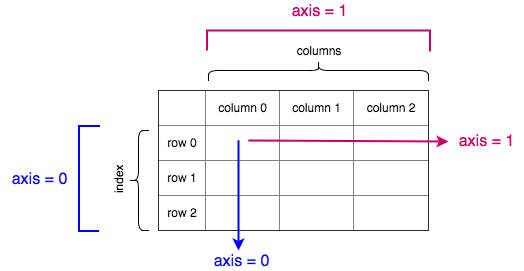


**Picture 9.** DataFrame axes.

DataFrame's method `axes` can be used to output both axes, the rows index (`axis = 0`) first, then column names (`axis=1`). 

In [ ]:
prov_support.axes

Multiple methods in `pandas` are using `axis` as a parameter. Let's see an example. Pandas has method `sort_index()` which will sort a `DataFrame` based on either index or column headers.

The code below will sort a `DataFrame` based on the index (`axis = 0`). The default order is ascending, which means in our case - alphabetical order, since our index is of a *string* type. We can change the sort order using the `ascending=` parameter.

In [ ]:
prov_support.sort_index(axis=0, ascending=True) 

In [ ]:
# Sorting by column names:

prov_support.sort_index(axis=1, ascending=True) 

**NOTE:** `Series` have only one axis and it is a row axis.

You can also see that indexes are of `pandas` **`Index`** object type:

In [ ]:
obj1 = prov_support.index
type(obj1)
obj1

In [ ]:
obj2 = prov_support.columns
type(obj2)


In [ ]:
print(obj1); print(obj2)

#### Hierarchical indexes in DataFrames

Pandas supports hierarchical indexes, or multi-level index. Hierarchical index allows us to manipulate the data with any number of dimensions within a two-dimensional `DataFrame`. Please refer to [`pandas` documentation](https://pandas.pydata.org/pandas-docs/stable/advanced.html) for more details. We will come back to hierarchical indexes later, where we are going to talk about aggregating the data in the `DataFrame`.

To introduce the concept, here is a simple example:

In [ ]:
df_hierarch = pd.DataFrame(data=[4, 7, 2, 5, 6],
                           columns=['Data'],
                           index= 
                           [['a', 'a', 'b', 'b', 'a'],
                            ['x', 'y', 'x', 'y', 'x']])

In [ ]:
df_hierarch

In [ ]:
df_hierarch.index

As you can see, the index of this `DataFrame` has 2 levels, one level has indexes `'a'` and `'b'`, and the second level, - `'x'` and `'y'`. The type of this index is `MultiIndex`.

Now that we understand axes and indexes, let's talk about selecting data, indexing and slicing.

A column in a `DataFrame` can be retrieved either by dictionary-like notation using column's name, or by attribute:

In [ ]:
prov_support

In [ ]:
type(prov_support)

In [ ]:
# Here we are using a column name

prov_support['province_name']

In [ ]:
# Here we are using an attribute

prov_support.province_name

The result is the same, in both cases the data is retrieved as a `Series` object, and in both cases it is exactly the same object. We can confirm it as follows:

In [ ]:
prov_support['province_name'] is prov_support.province_name

In [ ]:
print(type(prov_support['province_name']))
print(type(prov_support.province_name))

## **NOTE**:
#### Please note that retrieving the data using column name, ` prov_support['province_name']`, works for any column name, but getting the data by attribute will work only if the column name does not contain any spaces and is, in general, a valid Python variable. This means that we cannot use this method to access columns with year as a column name because it starts with a number:

In [ ]:
# This will return an error because a number is not a valid Python variable name
# We know that Python variables cannot start with a number

prov_support.2016

In [ ]:
# This will always work:

pro_2016=prov_support['2016']
pro_2016
type(pro_2016)

To select multiple columns of data, we need to pass a list of columns. The output will be a `DataFrame`:

In [ ]:
ddd=prov_support[['province_name','2018']]
ddd
type(ddd)

To select rows from the `DataFrame`, use the indexing operators `.loc` or `.iloc`:

- `.loc` is used to select rows by index labels
- `.iloc` is used to select rows by integer index, by position

Here are examples of both methods:

In [ ]:
# Select data for Ontario by the label 'ON':
ont= prov_support.loc['ON']
ont
#type(ont)  # check the type type(ont)

In [ ]:
# Selecting data for Ontario, British Columbia and Quebec by labels:

prov_support.loc[['ON', 'BC', 'QC']]

In [ ]:
# Selecting Ontario by position using .iloc method:

prov_support.iloc[5]

In [ ]:
# Selecting data for Ontario, British Columbia and Quebec by position:

prov_support.iloc[[5,9,4]]

We can select a range, or a slice, of rows by specifying the start and end row position or index label. If we use row position, `.iloc[start:end]`, then the row identified by `end` position is not included in the resulting output.

In [ ]:
prov_support.iloc[:5]   # rows with position 0, 1,2,3,and 4 but not 5

In [ ]:
fed_sup.loc[:5] # is used only if we use the default index label,we can not apply it on  dataframe prov_support

In [ ]:
fed_sup.iloc[:5]

The loc method returned rows with index label in the list of values from 0 to 5, which includes 0, 1, 2, 3, 4, and 5 (six rows). However, the iloc method returns the rows in the positions included in the range 0 to 5. Since integer ranges don't include the upper-bound value, this includes positions 0, 1, 2, 3, and 4 (five rows).

However, when we use index labels, both the start and the end positions are included:

In [ ]:
prov_support.loc[:'NS'] 

In [ ]:
# Only numeric columns:

prov_support[['2016', '2017', '2018']]

In [ ]:
# We can achieve the same result using .iloc()

prov_support.iloc[:, 1:]

As we just saw, we can select a slice (subset) of rows and columns. In the example below we are selecting the first 3 rows and the first 2 columns only:

In [ ]:
prov_support.iloc[:3, :2]

In [ ]:
# Same, but using row and column labels

prov_support.loc[:'ON', :'2017']

Sometimes there is a need to select data based on the condition, for example, select all rows where federal support in 2018 is greater than 3000. This is called **Boolean indexing**:

In [ ]:
prov_support[prov_support['2018'] > 3000]

If there is a list of values that we are looking for within the `DataFrame`, we can use `isin()` function. In the example below, we are looking for rows with indexes 'AB', 'ON' and 'BC':

In [ ]:
prov_support[prov_support.index.isin(['AB', 'ON', 'BC'])]

In [ ]:
prov_support[prov_support['2017'].isin([22720, 21101])]


If we need to combine multiple conditions, we can use `and` operator `&`:

In [ ]:
prov_support[(prov_support['2017'] > 6000) & (prov_support.index.isin(['AB', 'ON', 'BC']))]

"Is not" can be coded using `~` operator:

In [ ]:
# Selecting rows where support in 2017 does not equal to 6680:
prov_support[~(prov_support['2017'] == 6680)]  # returns all rows except British Columbia

In [ ]:
# Another way of doing the same thing:

prov_support[prov_support['2017'] != 6680] 

#### Pandas string methods

We can use all `string` methods in `pandas` `DataFrame` through `str()` method. For example, here is how we can convert all province names to lower case:

In [ ]:
prov_support.province_name.str.lower()

In [ ]:
# Selecting all rows where province name contains character 'm'
prov_support[prov_support.province_name.str.contains('m')]

In [ ]:
# In the result set, we don't see Manitoba because the name of the province
# starts with the upper-case 'M'. Let's fix it:

prov_support[prov_support.province_name.str.lower().str.contains('m')]

In [ ]:
# Same result as above, but we want only a column with province names:
prov_support.loc[prov_support.province_name.str.lower().str.contains('m'), ['province_name']]

**NOTE:** We can use all built-in Python string methods in `pandas`. Their application is not limited to the methods we used in this section.

#### **EXERCISE 3:** Loading data into DataFrame, exploring

For this exercise, we will take the Chocolate Bar Ratings dataset. We have downloaded the data from [Kaggle](https://www.kaggle.com/rtatman/chocolate-bar-ratings), "Data" tab. The dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

You can read about the data either on the "Overview" page of the dataset on Kaggle web site, or go to the [Flavors of Cacao](http://flavorsofcacao.com/index.html) website where the data originally [came from](http://flavorsofcacao.com/chocolate_database.html), and read about the rating system used in this dataset, overview of factors that contribute to the chocolate flavour and other useful and interesting information about chocolate.

The dataset contains the following data attributes:

| ***Attribute*** | ***Description*** |
| ---: | :--- |
| **Company (Maker-if known)** | Name of the company manufacturing the bar. |
| **Specific Bean Origin or Bar Name** | The specific geo-region of origin for the bar. |
| **REF** | Reference number, a value linked to when the review was entered in the database. Higher = more recent. |
| **Review Date** | Date of publication of the review. |
| **Cocoa Percent** | Cocoa percentage (darkness) of the chocolate bar being reviewed. |
| **Company Location** | Manufacturer base country. |
| **Rating** | Expert rating for the bar. |
| **Bean Type** | The variety of bean used, if provided. |
| **Broad Bean Origin** | The broad geo-region of origin for the bean. |
|||

**Task 1** - Load the data from `flavors_of_cacao.csv` file into the `DataFrame`, assume that the file is in the same folder as the notebook. If the file is in different directory on your system, make sure you include the full path to the file. 

Answer the following questions:
- How many entries are there in the dataset?
- What is the `dtype` of the data in the `Rating` column?

In [36]:
# Type your code here
# We can simply load all the data without specifying any parameters at this point

chocolate = pd.read_csv('flavors_of_cacao.csv')
chocolate.head(10)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In order to answer the questions, all we can do is to use `info()` method to explore the dataset:

In [ ]:
chocolate.info()

In [ ]:
# We can also use `.shape` attribute
# it will output 2 numbers, the number of rows and number of columns
# this will give us an answer to the first question only

chocolate.shape

Q1: How many entries are there in the dataset?

Answer: There are 1795 entries in the dataset, we can see it from the second line: 

```
RangeIndex: 1795 entries, 0 to 1794
```

Q2: What is the `dtype` of the data in the `Rating` column?

Answer: we can answer this question by looking at the output of the `info()` above. The `Rating` column has `float64` dtype. We can also retrieve information about this column as follows:

In [ ]:
chocolate[['Rating']].info()

In [ ]:
chocolate['Rating'].dtypes

**Task 2 -** In this task, we want to take a look at the header row of the `DataFrame` with column names. We also want to investigate "Bean Type" column.

- Print out the column names. What can you tell about the format of the column names?
- Update column names, assign names that are easy to work with. You can update all column names or only some of them, and you can assign any new names.
- Explore "Bean Type" column. How many entries are there in this column? Are there any empty values?

**Task 2**. Let's print out the names of the columns:

In [ ]:
# Type your code here

In [35]:
chocolate.columns

NameError: name 'chocolate' is not defined

You can see that almost every column name contains a special character, `\n`, which is a newline character. Also, some of the column names are quite long, e.g. `'Company \n(Maker-if known)'`. To simplify the data manipulation, we suggest renaming the columns:

In [40]:
#chocolate.columns = ['company', 'bar_name', 'REF', 'review_date', 'cocoa_per', 'company_location', 'rating','bean_type', 'bean_origin']
chocolate.rename(columns={'Company\n(Maker-if known)':'Company'},inplace=True)
chocolate.head(10)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


The answer to the last question requires a little investigation. If you look at the output of the `info()` function, you will notice that there are 1974 entries in this column, but in the output of the `.head(10)` function we can see that only 3 out of 10 rows have values populated. This means that other rows contain some special characters which `pandas` treat as values. Let's pick a row and look closer at the `bean_type` value:

In [ ]:
chocolate.bean_type[3]
#chocolate.bean_type.info

The `\xa0` is a symbol for [non-breaking space](https://en.wikipedia.org/wiki/Non-breaking_space). We can check unique values in this column and see if there are other special characters in the data:

In [ ]:
chocolate.bean_type.unique()

You will learn in the next lectures how to deal with the empty/missing values and how to clean your data and prepare it for further analysis. For now, we will provide you with a quick solution to clean `bean_type` column:

In [ ]:
import numpy as np

chocolate.replace(u'\xa0', np.nan, regex=True, inplace=True)
#we cannot manually list out all the texts that we want to replace. So in those cases,
#we use regular expressions (regex=True) to deal with such data having some pattern in it.


In [ ]:
chocolate.head(10)

In [ ]:
chocolate.info()

We simply replaced the `'\xa0'` character with `NaN` values. As you can see, now the `bean_type` column contains only 907 values.

**NOTE**: The `u` character in front of the `'\xa0'` indicates that we ask Python to treat this character as a Unicode string. For more information on Unicode please refer to Python Documentation [Unicode HOWTO](https://docs.python.org/3/howto/unicode.html).

Another way to clean the non-breaking spaces from the data set is to use `na_values='\xa0'` parameter in the `read_csv()` function and remove these special characters at the time we read the `.csv` file and create the `DataFrame`:

In [ ]:
chocolate = pd.read_csv('flavors_of_cacao.csv', na_values='\xa0')
chocolate

You will learn more about Null values handling in the coming lectures.